## 1. Carga y Perfilado de datos
Primero, cargamos el dataset y realizamos un análisis preliminar para entender su estructura, tipos de datos y posibles problemas como valores nulos o duplicados.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = 'EventosSismicosVolcanMisti_Dataset.csv'
df = pd.read_csv(file_path)

In [5]:
# --- 1. Perfilado de Datos ---
print("\n--- Perfilado Inicial de Datos ---")

# Muestra las primeras 5 filas
print("\nPrimeras 5 filas del dataset:")
print(df.head())

# Muestra información general (tipos de datos, nulos)
print("\nInformación del DataFrame:")
df.info()

# Muestra estadísticas descriptivas para columnas numéricas
print("\nEstadísticas Descriptivas:")
print(df.describe())

# Verifica valores nulos
print("\nValores Nulos por Columna:")
print(df.isnull().sum())

# Verifica filas duplicadas
print("\nNúmero de Filas Duplicadas:")
print(df.duplicated().sum())


--- Perfilado Inicial de Datos ---

Primeras 5 filas del dataset:
   FECHA_CORTE  UBIGEO  ANIO DEPARTAMENTO PROVINCIA  FECHA_UTC  HORA_UTC TIPO  \
0     20250530     401  2024     AREQUIPA  AREQUIPA   20240101     93337   VT   
1     20250530     401  2024     AREQUIPA  AREQUIPA   20240101    102825   VT   
2     20250530     401  2024     AREQUIPA  AREQUIPA   20240101    104711   VT   
3     20250530     401  2024     AREQUIPA  AREQUIPA   20240101    105517   VT   
4     20250530     401  2024     AREQUIPA  AREQUIPA   20240101    110838   VT   

   FRECUENCIA_PRINCIPAL  DURACION   ENERGIA VOLCAN  
0                   5.6     58.59  0.000147  MISTI  
1                   3.0     76.02  0.000149  MISTI  
2                   2.8     44.98  0.000137  MISTI  
3                   3.8     64.75  0.001042  MISTI  
4                   3.8     52.50  0.000175  MISTI  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 12 col

## 2. Limpieza y Transformación de Datos 
En este paso, realizamos las siguientes acciones:

1. Combinamos FECHA_UTC y HORA_UTC en una sola columna de tipo datetime para facilitar análisis temporales.

2. Convertimos FECHA_CORTE a formato datetime.

3. Reorganizamos las columnas para un mejor entendimiento.

In [6]:
# --- 2. Limpieza y Transformación ---
print("\n--- Limpiando y Transformando Datos ---")
df_cleaned = df.copy()

# Combina FECHA_UTC y HORA_UTC en una columna DATETIME_UTC
# Convierte a string y rellena la hora con ceros a la izquierda para un formato estándar
df_cleaned['FECHA_UTC_STR'] = df_cleaned['FECHA_UTC'].astype(str)
df_cleaned['HORA_UTC_STR'] = df_cleaned['HORA_UTC'].astype(str).str.zfill(6)

# Crea la columna datetime. 'coerce' convertirá fechas inválidas en NaT (Not a Time)
df_cleaned['DATETIME_UTC'] = pd.to_datetime(
    df_cleaned['FECHA_UTC_STR'] + df_cleaned['HORA_UTC_STR'], 
    format='%Y%m%d%H%M%S', 
    errors='coerce'
)

# Convierte FECHA_CORTE
df_cleaned['FECHA_CORTE'] = pd.to_datetime(df_cleaned['FECHA_CORTE'], format='%Y%m%d')

# Elimina las columnas auxiliares y las originales de fecha/hora
df_cleaned = df_cleaned.drop(columns=['FECHA_UTC_STR', 'HORA_UTC_STR', 'FECHA_UTC', 'HORA_UTC'])

# Elimina filas donde la conversión de fecha falló (si las hubiera)
df_cleaned.dropna(subset=['DATETIME_UTC'], inplace=True)

# Reordena las columnas para mayor claridad
df_cleaned = df_cleaned[[
    'FECHA_CORTE', 'DATETIME_UTC', 'UBIGEO', 'ANIO', 'DEPARTAMENTO', 
    'PROVINCIA', 'TIPO', 'FRECUENCIA_PRINCIPAL', 'DURACION', 
    'ENERGIA', 'VOLCAN'
]]

print("\nDataset después de la limpieza y transformación:")
print(df_cleaned.head())

print("\nNueva información del DataFrame:")
df_cleaned.info()


--- Limpiando y Transformando Datos ---

Dataset después de la limpieza y transformación:
  FECHA_CORTE        DATETIME_UTC  UBIGEO  ANIO DEPARTAMENTO PROVINCIA TIPO  \
0  2025-05-30 2024-01-01 09:33:37     401  2024     AREQUIPA  AREQUIPA   VT   
1  2025-05-30 2024-01-01 10:28:25     401  2024     AREQUIPA  AREQUIPA   VT   
2  2025-05-30 2024-01-01 10:47:11     401  2024     AREQUIPA  AREQUIPA   VT   
3  2025-05-30 2024-01-01 10:55:17     401  2024     AREQUIPA  AREQUIPA   VT   
4  2025-05-30 2024-01-01 11:08:38     401  2024     AREQUIPA  AREQUIPA   VT   

   FRECUENCIA_PRINCIPAL  DURACION   ENERGIA VOLCAN  
0                   5.6     58.59  0.000147  MISTI  
1                   3.0     76.02  0.000149  MISTI  
2                   2.8     44.98  0.000137  MISTI  
3                   3.8     64.75  0.001042  MISTI  
4                   3.8     52.50  0.000175  MISTI  

Nueva información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data col

## Detección de Outliers (Valores Atípicos)
Visualizamos las distribuciones de las columnas numéricas clave para identificar posibles valores atípicos que podrían afectar los análisis estadísticos. Usaremos diagramas de caja (box plots) para esto.


--- Generando Gráficos para Detección de Outliers ---

Gráfico 'outlier_boxplots.png' generado para mostrar outliers.


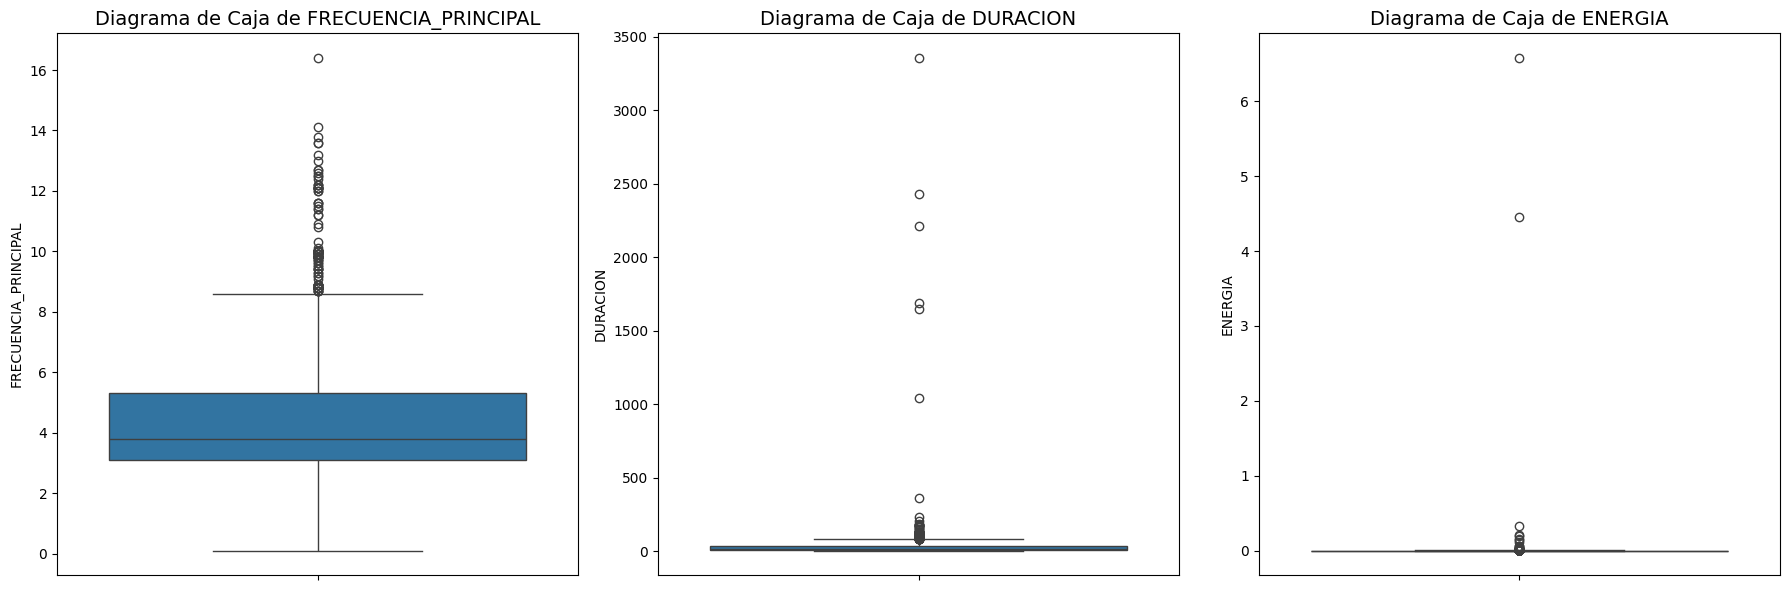

In [7]:
# --- 3. Detección de Outliers ---
print("\n--- Generando Gráficos para Detección de Outliers ---")
numerical_cols = ['FRECUENCIA_PRINCIPAL', 'DURACION', 'ENERGIA']

plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Diagrama de Caja de {col}', fontsize=14)
    plt.ylabel(col)

plt.tight_layout()
plt.savefig('outlier_boxplots.png')
print("\nGráfico 'outlier_boxplots.png' generado para mostrar outliers.")

**Interpretación de los Gráficos:**

Las columnas DURACION y ENERGIA muestran una cantidad significativa de valores atípicos (los puntos fuera de los "bigotes" del diagrama). Esto es común en datos de eventos naturales, donde algunos eventos son mucho más extremos que la mayoría. Para los análisis en Hadoop, podríamos considerar estrategias como la transformación logarítmica o el filtrado de estos valores dependiendo de la pregunta que queremos responder.

## Generación del CSV Final 
Finalmente, guardamos el DataFrame limpio en un nuevo archivo CSV. Este archivo será el input para los trabajos de MapReduce en Hadoop y para la visualización en Power BI.

In [8]:
# --- 4. Guardar el dataset limpio ---
cleaned_file_path = 'EventosSismicosVolcanMisti_Cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\n✅ ¡Proceso completado! El dataset limpio se ha guardado en: '{cleaned_file_path}'")


✅ ¡Proceso completado! El dataset limpio se ha guardado en: 'EventosSismicosVolcanMisti_Cleaned.csv'
